In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


In [ ]:
!pip install tensorflow

In [158]:
df = pd.read_csv('/content/drive/MyDrive/UU/BTC-USD (BaoCao).csv')


df = df.groupby('Date').sum()

In [ ]:
!pip install keras

In [159]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
...,...,...,...,...,...,...
2024-05-28,69392.195313,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
2024-05-29,68296.351563,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
2024-05-30,67576.085938,69500.539063,67118.078125,68364.992188,68364.992188,29509712534


In [160]:
import numpy as np
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .7 ))
dataset

array([[ 3859.58374 ],
       [ 3864.415039],
       [ 3847.175781],
       ...,
       [68364.992188],
       [67491.414063],
       [67706.9375  ]])

In [161]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00141408],
       [0.00148377],
       [0.00123509],
       ...,
       [0.93193342],
       [0.91933166],
       [0.92244068]])

In [162]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we use 60 days ahead for forecasting range
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00141408, 0.00148377, 0.00123509, 0.        , 0.00194481,
       0.00205397, 0.00216277, 0.00201342, 0.00291043, 0.00274145,
       0.00207251, 0.00212918, 0.002094  , 0.00234864, 0.00287577,
       0.00414254, 0.00380358, 0.00390858, 0.0044666 , 0.00470153,
       0.0038627 , 0.0037854 , 0.00395646, 0.00375943, 0.00290692,
       0.00322443, 0.00469561, 0.00443655, 0.00485874, 0.00497827,
       0.00496015, 0.00572151, 0.01613228, 0.01747592, 0.01675143,
       0.01839423, 0.01872798, 0.02073427, 0.02204517, 0.02082171,
       0.0225469 , 0.01879536, 0.01915673, 0.01925839, 0.02028456,
       0.01883316, 0.02126314, 0.02149941, 0.02216944, 0.02224772,
       0.02273925, 0.02240235, 0.02362611, 0.02612167, 0.024571  ,
       0.02090187, 0.02189481, 0.02173531, 0.02197835, 0.02143326])]
[0.022924479150234697]

[array([0.00141408, 0.00148377, 0.00123509, 0.        , 0.00194481,
       0.00205397, 0.00216277, 0.00201342, 0.00291043, 0.00274145,
       0.00207251, 0.00212918, 0.0

<Axes: xlabel='Date'>

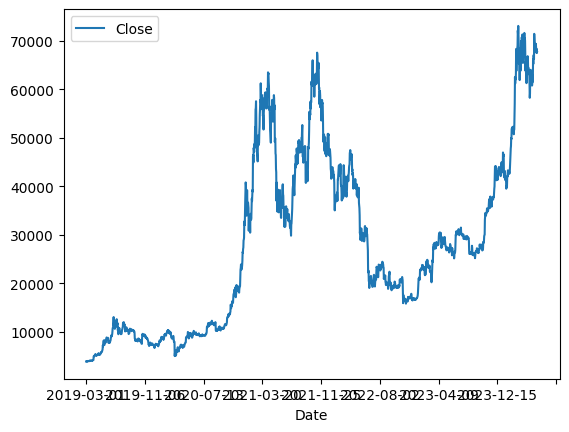

In [163]:
data.plot()

In [165]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1284/1284 [==============================] - 86s 64ms/step - loss: 0.0022


In [166]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Dự đoán dữ liệu kiểm tra
predictions = model.predict(x_test)

# Chuẩn bị dữ liệu đầu vào cho dự đoán 30, 60, và 90 ngày
x_input = test_data[-60:].reshape(1, -1)
temp_input = list(x_input[0])

# Dự đoán 30, 60, và 90 ngày tiếp theo
lst_output = []
n_steps = 60
i = 0
while i < 90:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

18/18 [==============================] - 3s 61ms/step


In [167]:
# Chuẩn bị dữ liệu cho biểu đồ
train_data = scaled_data[:training_data_len]
valid_data = scaled_data[training_data_len:]
train_data_index = pd.RangeIndex(start=0, stop=len(train_data), step=1)
test_data_index = pd.RangeIndex(start=len(train_data), stop=len(train_data) + len(valid_data), step=1)


In [168]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(scaled_data)  # Giả sử scaled_data đã được chuẩn bị trước
train_data_inv = scaler.inverse_transform(train_data)
valid_data_inv = scaler.inverse_transform(valid_data)
predictions_inv = scaler.inverse_transform(predictions)
lst_output_inv = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))


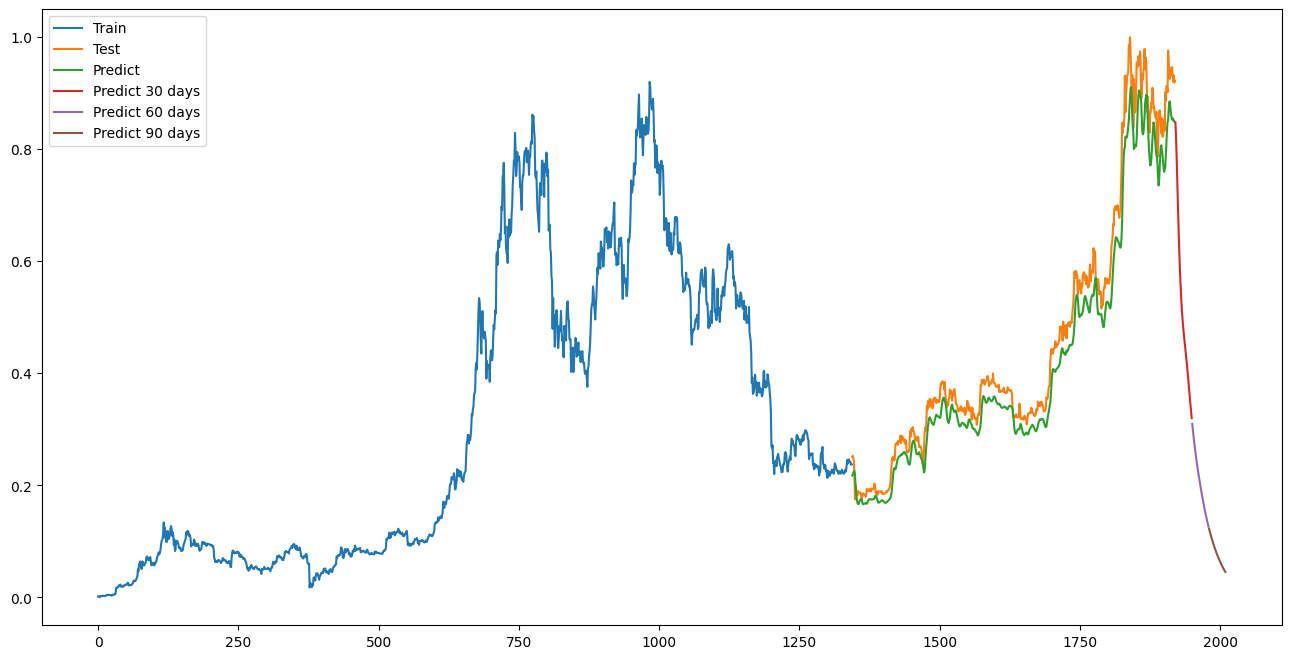

In [169]:

# Vẽ biểu đồ
plt.figure(figsize=(16,8))
plt.plot(train_data_index, train_data_inv, label='Train')
plt.plot(test_data_index, valid_data_inv, label='Test')
plt.plot(test_data_index, predictions_inv, label='Predict')

# Chỉ số dữ liệu dự đoán 30 ngày đầu tiên
predict_data_index_30 = pd.RangeIndex(start=len(scaled_data), stop=len(scaled_data) + 30, step=1)
plt.plot(predict_data_index_30, lst_output_inv[:30], label='Predict 30 days')

# Chỉ số dữ liệu dự đoán 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(scaled_data) + 30, stop=len(scaled_data) + 60, step=1)
plt.plot(predict_data_index_60, lst_output_inv[30:60], label='Predict 60 days')

# Chỉ số dữ liệu dự đoán 90 ngày cuối cùng
predict_data_index_90 = pd.RangeIndex(start=len(scaled_data) + 60, stop=len(scaled_data) + 90, step=1)
plt.plot(predict_data_index_90, lst_output_inv[60:90], label='Predict 90 days')

# Hiển thị đồ thị
plt.legend()
plt.show()

In [170]:
# Dự đoán giá trị
predictions = model.predict(x_test)

# Chuẩn bị y_test (giá trị thực tế)
y_test = dataset[training_data_len:, :]

# Inverse transform predictions and y_test to get actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)



18/18 [==============================] - 1s 40ms/step


In [171]:
# Tính toán MSE
mse = mean_squared_error(y_test, predictions)

# Tính toán RMSE
rmse = np.sqrt(mse)

# Tính toán MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 1516811239.7099926
Root Mean Squared Error (RMSE): 38946.26092078664
Mean Absolute Percentage Error (MAPE): 0.9999884643432263
